In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
# Parameters
BATCH_SIZE = 32
SAMPLES_PER_BATCH = 1000

In [5]:
# Generate training and output data
x_train = tf.random.uniform(shape=[BATCH_SIZE*SAMPLES_PER_BATCH,], minval=-2.0 * np.pi, maxval=2.0 * np.pi)
y_train = tf.math.sin(x_train)

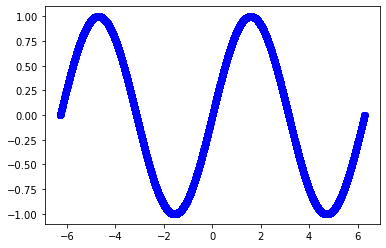

In [6]:
# Create visualization of the training data
plt.plot(x_train, y_train, 'bo')
plt.show()

In [7]:
# Create model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [8]:
# Compile model
model.compile(optimizer='adam',
              loss='mse')

In [9]:
# Train the model
model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=20)

Epoch 1/20
1000/1000 [==============================] - 3s 2ms/step - loss: 0.1928
Epoch 2/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0713
Epoch 3/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0442
Epoch 4/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0244
Epoch 5/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0114
Epoch 6/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0048
Epoch 7/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0022
Epoch 8/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0013
Epoch 9/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0011
Epoch 10/20
1000/1000 [==============================] - 2s 2ms/step - loss: 9.8601e-04
Epoch 11/20
1000/1000 [==============================] - 2s 2ms/step - loss: 8.7819e-04
Epoch 12/20
1000/1000 [==============================] - 2s 2ms/step - loss: 

4/4 [==============================] - 0s 2ms/step


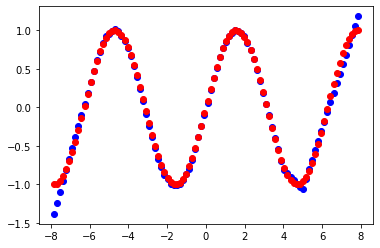

In [10]:
# Plot model predictions and reference
test_inputs = np.linspace(-2.5 * np.pi, 2.5 * np.pi, num=100)
test_outputs = model.predict(test_inputs)
reference = tf.math.sin(test_inputs)

plt.plot(test_inputs, test_outputs, 'bo')
plt.plot(test_inputs, reference, 'ro')
plt.show()

In [11]:
# Export model
model.save("stored-model")

INFO:tensorflow:Assets written to: stored-model\assets


INFO:tensorflow:Assets written to: stored-model\assets


In [12]:
# Load in the saved model
loaded_model = tf.keras.models.load_model("stored-model")

In [13]:
# Make prediction with model loaded from file
loaded_test_input = -1.0

print("Predicted: from file:")
print(loaded_model.predict(np.array([loaded_test_input]), verbose=0)[0][0])
print("Predicted: from memory:")
print(model.predict(np.array([loaded_test_input]), verbose=0)[0][0])
print("Reference:")
print(np.sin([loaded_test_input])[0])

Predicted: from file:
-0.8506356
Predicted: from memory:
-0.8506356
Reference:
-0.8414709848078965
